In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

C:\Users\ericv\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
liq=pd.read_feather('C:\\Users\ericv\Box\School\Winter 2023\Fin 585R\Project\liq_data_updated.feather')
liq['vals']=liq['vals']*1000000
liq

,index,vals
0,10192610006,1.191493e-03
1,10192610022,1.342261e-02
2,10192610030,4.944852e-02
3,10192610049,-3.803185e-02
4,10192610057,NaN
...,...,...
3549131,9202293425,-2.938097e-04
3549132,9202293426,-5.287389e-03
3549133,9202293427,4.332515e-05
3549134,9202293429,-1.978194e-05


In [3]:
path = r"C:\\Users\ericv\Downloads\06-mstk_62-22 (1).csv"
df=pd.read_csv(path,parse_dates=['caldt'])
df

,permno,caldt,ticker,prc,me,ret,shr
0,10000,1986-01-31,OMFGA,4.37500,16.1000,NaN,3680.0
1,10000,1986-02-28,OMFGA,3.25000,11.9600,-0.257143,3680.0
2,10000,1986-03-31,OMFGA,4.43750,16.3300,0.365385,3680.0
3,10000,1986-04-30,OMFGA,4.00000,15.1720,-0.098592,3793.0
4,10000,1986-05-30,OMFGA,3.10938,11.7939,-0.222656,3793.0
...,...,...,...,...,...,...,...
3384890,93436,2022-05-31,TSLA,758.26000,785565.0000,-0.129197,1036010.0
3384891,93436,2022-06-30,TSLA,673.42000,701030.0000,-0.111888,1041000.0
3384892,93436,2022-07-29,TSLA,891.45000,931111.0000,0.323765,1044490.0
3384893,93436,2022-08-31,TSLA,275.61000,863616.0000,-0.072489,3133470.0


In [4]:
## Some date cleaning
liq['datepermno']=pd.to_numeric(liq['index'])
liq['permno']=pd.to_numeric(liq['datepermno'].astype(str).str[-5:])
liq['caldt']=pd.to_numeric(liq['datepermno'].astype(str).str[:-5])
liq['newdate']=liq['caldt'].astype(str).str[:-4] + '-' + liq['caldt'].astype(str).str[-4:]
liq['caldt']=pd.to_datetime(liq['caldt'])
liq

,index,vals,datepermno,permno,caldt,newdate
0,10192610006,1.191493e-03,10192610006,10006,1970-01-01 00:00:00.000101926,10-1926
1,10192610022,1.342261e-02,10192610022,10022,1970-01-01 00:00:00.000101926,10-1926
2,10192610030,4.944852e-02,10192610030,10030,1970-01-01 00:00:00.000101926,10-1926
3,10192610049,-3.803185e-02,10192610049,10049,1970-01-01 00:00:00.000101926,10-1926
4,10192610057,NaN,10192610057,10057,1970-01-01 00:00:00.000101926,10-1926
...,...,...,...,...,...,...
3549131,9202293425,-2.938097e-04,9202293425,93425,1970-01-01 00:00:00.000092022,9-2022
3549132,9202293426,-5.287389e-03,9202293426,93426,1970-01-01 00:00:00.000092022,9-2022
3549133,9202293427,4.332515e-05,9202293427,93427,1970-01-01 00:00:00.000092022,9-2022
3549134,9202293429,-1.978194e-05,9202293429,93429,1970-01-01 00:00:00.000092022,9-2022


In [32]:
liq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3549136 entries, 0 to 3549135
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   index       object 
 1   vals        float64
 2   datepermno  int64  
 3   permno      int64  
 4   caldt       object 
 5   newdate     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 162.5+ MB


In [5]:
liq['caldt']=pd.to_datetime(liq['newdate'])
liq['caldt']=liq['caldt'] + pd.offsets.MonthEnd(0) 

<ipython-input-5-697db353df9a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  liq['caldt']=pd.to_datetime(liq['newdate'])


In [6]:
liq=liq.drop(['index','datepermno','newdate'],axis=1)
liq

,vals,permno,caldt
0,1.191493e-03,10006,1926-10-31
1,1.342261e-02,10022,1926-10-31
2,4.944852e-02,10030,1926-10-31
3,-3.803185e-02,10049,1926-10-31
4,NaN,10057,1926-10-31
...,...,...,...
3549131,-2.938097e-04,93425,2022-09-30
3549132,-5.287389e-03,93426,2022-09-30
3549133,4.332515e-05,93427,2022-09-30
3549134,-1.978194e-05,93429,2022-09-30


In [7]:
liq=liq.sort_values(['permno','caldt']).reset_index(drop=True)
liq

,vals,permno,caldt
0,5.330482e-01,10001,1986-09-30
1,4.991615e-02,10001,1986-10-31
2,-1.580374e-01,10001,1986-11-30
3,-1.390274e+00,10001,1986-12-31
4,-7.518338e-02,10001,1987-01-31
...,...,...,...
3549131,-5.279940e-07,93436,2022-05-31
3549132,2.189319e-07,93436,2022-06-30
3549133,3.855547e-08,93436,2022-07-31
3549134,-2.491951e-07,93436,2022-08-31


In [8]:
liq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3549136 entries, 0 to 3549135
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   vals    float64       
 1   permno  int64         
 2   caldt   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 81.2 MB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3384895 entries, 0 to 3384894
Data columns (total 7 columns):
 #   Column  Dtype         
---  ------  -----         
 0   permno  int64         
 1   caldt   datetime64[ns]
 2   ticker  object        
 3   prc     float64       
 4   me      float64       
 5   ret     float64       
 6   shr     float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 180.8+ MB


In [10]:
df=df.merge(liq,on=['permno','caldt'])
df

,permno,caldt,ticker,prc,me,ret,shr,vals
0,10001,1986-09-30,GFGC,6.375,6.317630e+00,-0.003077,991.0,5.330482e-01
1,10001,1986-10-31,GFGC,6.625,6.565380e+00,0.039216,991.0,4.991615e-02
2,10001,1986-12-31,GFGC,7.000,6.937000e+00,0.015000,991.0,-1.390274e+00
3,10001,1987-03-31,GFGC,6.375,6.317630e+00,0.036800,991.0,1.773907e+00
4,10001,1987-04-30,GFGC,6.125,6.069870e+00,-0.039216,991.0,9.369708e-01
...,...,...,...,...,...,...,...,...
1595073,93436,2022-03-31,TSLA,1077.600,1.116370e+06,0.238009,1035980.0,2.070101e-07
1595074,93436,2022-05-31,TSLA,758.260,7.855650e+05,-0.129197,1036010.0,-5.279940e-07
1595075,93436,2022-06-30,TSLA,673.420,7.010300e+05,-0.111888,1041000.0,2.189319e-07
1595076,93436,2022-08-31,TSLA,275.610,8.636160e+05,-0.072489,3133470.0,-2.491951e-07


In [11]:
df['stock_val']=df['prc']*df['shr']
df

,permno,caldt,ticker,prc,me,ret,shr,vals,stock_val
0,10001,1986-09-30,GFGC,6.375,6.317630e+00,-0.003077,991.0,5.330482e-01,6.317625e+03
1,10001,1986-10-31,GFGC,6.625,6.565380e+00,0.039216,991.0,4.991615e-02,6.565375e+03
2,10001,1986-12-31,GFGC,7.000,6.937000e+00,0.015000,991.0,-1.390274e+00,6.937000e+03
3,10001,1987-03-31,GFGC,6.375,6.317630e+00,0.036800,991.0,1.773907e+00,6.317625e+03
4,10001,1987-04-30,GFGC,6.125,6.069870e+00,-0.039216,991.0,9.369708e-01,6.069875e+03
...,...,...,...,...,...,...,...,...,...
1595073,93436,2022-03-31,TSLA,1077.600,1.116370e+06,0.238009,1035980.0,2.070101e-07,1.116372e+09
1595074,93436,2022-05-31,TSLA,758.260,7.855650e+05,-0.129197,1036010.0,-5.279940e-07,7.855649e+08
1595075,93436,2022-06-30,TSLA,673.420,7.010300e+05,-0.111888,1041000.0,2.189319e-07,7.010302e+08
1595076,93436,2022-08-31,TSLA,275.610,8.636160e+05,-0.072489,3133470.0,-2.491951e-07,8.636157e+08


In [12]:
dfrep=df.query("caldt>='1962-07-01'").reset_index(drop=True)
dfrep

,permno,caldt,ticker,prc,me,ret,shr,vals,stock_val
0,10001,1986-09-30,GFGC,6.375,6.317630e+00,-0.003077,991.0,5.330482e-01,6.317625e+03
1,10001,1986-10-31,GFGC,6.625,6.565380e+00,0.039216,991.0,4.991615e-02,6.565375e+03
2,10001,1986-12-31,GFGC,7.000,6.937000e+00,0.015000,991.0,-1.390274e+00,6.937000e+03
3,10001,1987-03-31,GFGC,6.375,6.317630e+00,0.036800,991.0,1.773907e+00,6.317625e+03
4,10001,1987-04-30,GFGC,6.125,6.069870e+00,-0.039216,991.0,9.369708e-01,6.069875e+03
...,...,...,...,...,...,...,...,...,...
1595073,93436,2022-03-31,TSLA,1077.600,1.116370e+06,0.238009,1035980.0,2.070101e-07,1.116372e+09
1595074,93436,2022-05-31,TSLA,758.260,7.855650e+05,-0.129197,1036010.0,-5.279940e-07,7.855649e+08
1595075,93436,2022-06-30,TSLA,673.420,7.010300e+05,-0.111888,1041000.0,2.189319e-07,7.010302e+08
1595076,93436,2022-08-31,TSLA,275.610,8.636160e+05,-0.072489,3133470.0,-2.491951e-07,8.636157e+08


In [13]:
dfrep.dropna()
dfrep['stock_val_lag']=dfrep.groupby('permno')['stock_val'].shift(1)

In [14]:
monthdf=dfrep.groupby('caldt')['vals'].mean().to_frame()
monthdf

,vals
caldt,
1962-07-31,-0.049229
1962-08-31,0.012820
1962-10-31,-0.257036
1962-11-30,-0.068401
1962-12-31,-0.055201
...,...
2022-03-31,-0.000061
2022-05-31,-0.002019
2022-06-30,-0.000186


In [15]:
monthdf['mt']=dfrep.groupby('caldt')['stock_val_lag'].sum()
monthdf=monthdf.query("caldt>='1962-08-01'")
monthdf

,vals,mt
caldt,,
1962-08-31,0.012820,3.214718e+08
1962-10-31,-0.257036,3.269789e+08
1962-11-30,-0.068401,3.106749e+08
1962-12-31,-0.055201,3.424457e+08
1963-01-31,-0.041982,3.479453e+08
...,...,...
2022-03-31,-0.000061,4.091874e+10
2022-05-31,-0.002019,4.185761e+10
2022-06-30,-0.000186,3.857673e+10


In [16]:
## Scale m by m1
dfm1=dfrep.query("caldt >= '1962-08-27' and caldt<='1962-08-31'")
m1=dfm1['stock_val'].sum()
m1

327648387.90625

In [17]:
monthdf['m']=monthdf['mt']/m1
monthdf

,vals,mt,m
caldt,,,
1962-08-31,0.012820,3.214718e+08,0.981149
1962-10-31,-0.257036,3.269789e+08,0.997957
1962-11-30,-0.068401,3.106749e+08,0.948196
1962-12-31,-0.055201,3.424457e+08,1.045162
1963-01-31,-0.041982,3.479453e+08,1.061947
...,...,...,...
2022-03-31,-0.000061,4.091874e+10,124.886138
2022-05-31,-0.002019,4.185761e+10,127.751627
2022-06-30,-0.000186,3.857673e+10,117.738199


In [18]:
monthdf['vals'].describe()

count    504.000000
mean      -0.008096
std        0.023121
min       -0.257036
25%       -0.009081
50%       -0.000756
75%        0.001562
max        0.035426
Name: vals, dtype: float64

In [19]:
monthdf['plottingval']=monthdf['vals']*monthdf['m']
monthdf

,vals,mt,m,plottingval
caldt,,,,
1962-08-31,0.012820,3.214718e+08,0.981149,0.012578
1962-10-31,-0.257036,3.269789e+08,0.997957,-0.256511
1962-11-30,-0.068401,3.106749e+08,0.948196,-0.064857
1962-12-31,-0.055201,3.424457e+08,1.045162,-0.057694
1963-01-31,-0.041982,3.479453e+08,1.061947,-0.044583
...,...,...,...,...
2022-03-31,-0.000061,4.091874e+10,124.886138,-0.007568
2022-05-31,-0.002019,4.185761e+10,127.751627,-0.257989
2022-06-30,-0.000186,3.857673e+10,117.738199,-0.021855


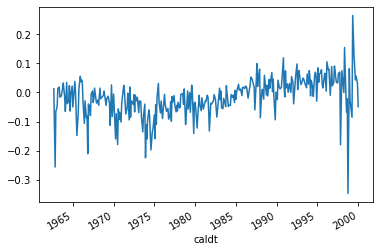

In [20]:
monthdf.loc['1962-01-01':'1999-12-31']['plottingval'].plot()
plt.show()

In [ ]:
## Is our M wrong?
## What if it is just the sum of price
df['stock_val_lag']=df.groupby('permno')['prc'].shift(1)


In [ ]:
reg = smf.ols('ex_ret ~ 1 + ret_lag + prod_dvl_ser',data = sample).fit() 